# Box and Whisker Plot

Um diagrama de caixa é um método de mostrar estatísticas agregadas de várias amostras em um único diagrama.
O objetivo desse diagrama é resumir a distribuição dos dados em uma visualização chamada `5-number-summary`: Valores máximos e mínimos, o centro (normalmente a mediana dos dados) e o primeiro e o terceiro quartil.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Agora vamos criar 3 diferentes amostras - Distribuição normal, aleatória e gamma.
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

# Vamos colocar esses dados em um DataFrame
df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df

,normal,random,gamma
0,-0.476436,0.772226,1.706153
1,-0.691437,0.084330,0.638596
2,0.061311,0.440297,1.838692
3,-0.399927,0.206064,3.341315
4,0.863343,0.504433,1.567509
...,...,...,...
9995,0.641736,0.329136,1.300685
9996,-1.067985,0.754271,0.814267
9997,0.318887,0.771254,3.632774
9998,0.088105,0.467676,3.031995


In [2]:
# Agora podemos utilizar a função describe() do pandas para ver alguns resumos estatísticos dos nossos dados
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.004031,0.500359,2.008777
std,0.990707,0.288215,1.423121
min,-3.674106,0.000040,0.012249
25%,-0.670909,0.249063,0.978761
50%,-0.007152,0.500041,1.685871
75%,0.676993,0.751534,2.671677
max,3.545547,0.999981,10.711264


Essa função nos mostra os valores mínimos e máximos e 3 diferentes valores de porcentagem. 

-25% é chamado de primeiro quartil

-50% é chamado de segundo quartil

-75% é chamado de terceiro quartil


Assim como o desvio padrão, os intervalos entre os quartis são uma medida de variabilidade de dado. E é comum plotar isso utilizando um box plot.
Em um box plot, a média, ou mediana, dos dados é plotada como uma linha reta. Duas caixas são formadas, uma acima, que representa o grupo de dados de 50% a 75%, e uma abaixo, que representa o grupo de dados de 25% a 50%. Linhas finas são então desenhadas para os valores mínimo e máximo.

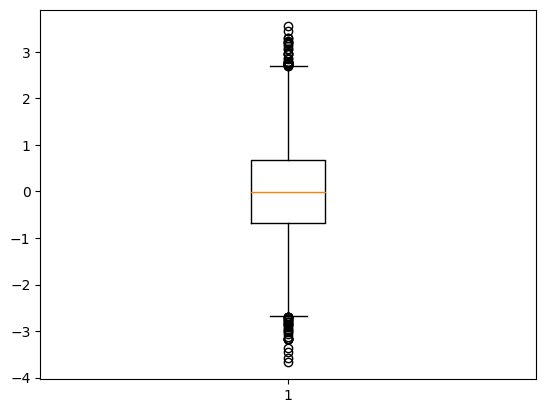

In [4]:
# Para plotar um boxplot, nós escolhemos a coluna do dataFrame que estão interessados e passamos como parâmetro
plt.boxplot(df['normal']);

Vamos adicionar mais amostras. Infelizmente, não podemos passar um dataFrame inteiro como parâmetro. Precisamos passar uma lista


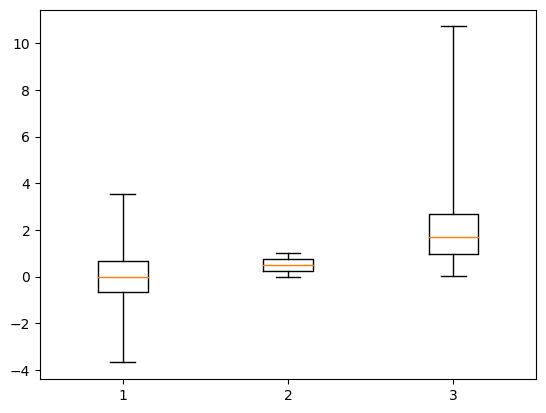

In [21]:
# boxplot de 3 colunas do dataframe
plt.boxplot([df['normal'],df['random'],df['gamma']],whis=[0,100]);

Tudo bem, isso nos dá nossas três distribuições. Agora, não normalizamos a escala, então isso é um pouco instável. Mas se olharmos para a distribuição gama, por exemplo, vemos que sua cauda é muito, muito longa. Portanto, os valores máximos estão muito distantes. Vamos dar uma olhada nisso por si só em um histograma.

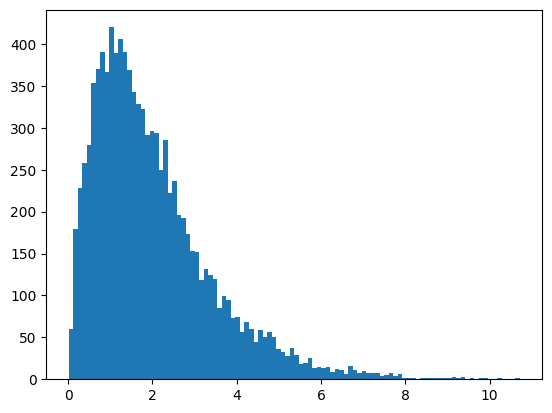

In [26]:
plt.hist(df['gamma'], bins=100);

Vamos adicionar isso ao boxplot.

Nós podemos sobrepor figuras.Fazemos isso utilizando a função `inset_axes`.
Passamos como parâmetro as posições x e y, altura e largura do novo plot.

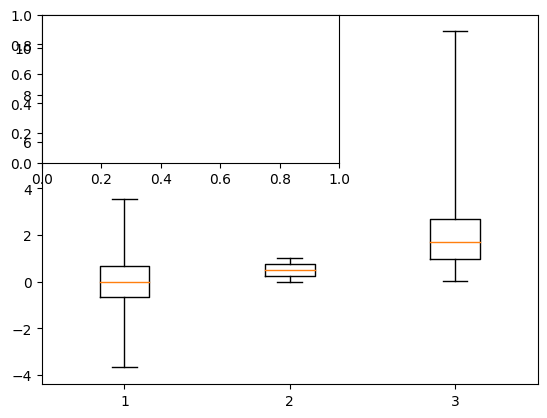

In [29]:
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100])

# Agora vamos plotar um novo axesObject. Ele será sobreposto no topo a vamos providenciar uma caixa 
# delimitada por (0,0.6) no canto inferior esquerdo e (0.6,0.4) como largura e altura.
ax2=plt.gca().inset_axes([0,0.6,0.6,0.4]) # Inserimos a caixa

Assim, inserimos a caixa, agora vamos plotar dentro dela

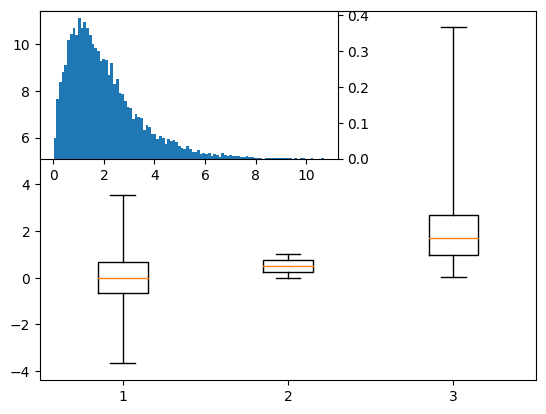

In [32]:
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100])

# Agora vamos plotar um novo axesObject. Ele será sobreposto no topo a vamos providenciar uma caixa 
# delimitada por (0,0.6) no canto inferior esquerdo e (0.6,0.4) como largura e altura.
ax2=plt.gca().inset_axes([0,0.6,0.6,0.4]) # Inserimos a caixa


# Vamos plotar
ax2.hist(df['gamma'], bins=100, density=True);

# Vamos colocar o eixo y para a direita
ax2.yaxis.tick_right();


Lembre-se novamente que cada boxplot é nosso resumo de cinco números -- uma linha mediana em vermelho no meio, depois duas caixas de cada lado que representam 25% da população, respectivamente, depois whisker que se estendem até o máximo e mínimo do dados. 

Agora, muitas vezes queremos olhar para um boxplot não vendo os valores máximos e mínimos, mas enfatizando os valores discrepantes.
Como os outliers são detectados realmente depende, e existem vários mecanismos para determinar se uma observação é um outlier ou não. Se olharmos para a documentação, porém, o padrão para matplotlib é que outliers são todos os pontos de dados que são maiores ou menores que a distância entre a dobradiça (parte inferior ou superior da caixa, ou primeiro e terceiro quartil) e 1,5 * o intervalo interquartil (IQR). A faixa interquartil é a distância entre as duas dobradiças, que captura 50% de nossos dados. Portanto, se omitirmos o parâmetro `whis` para a chamada boxplot, veremos os outliers usando esse método plotados.

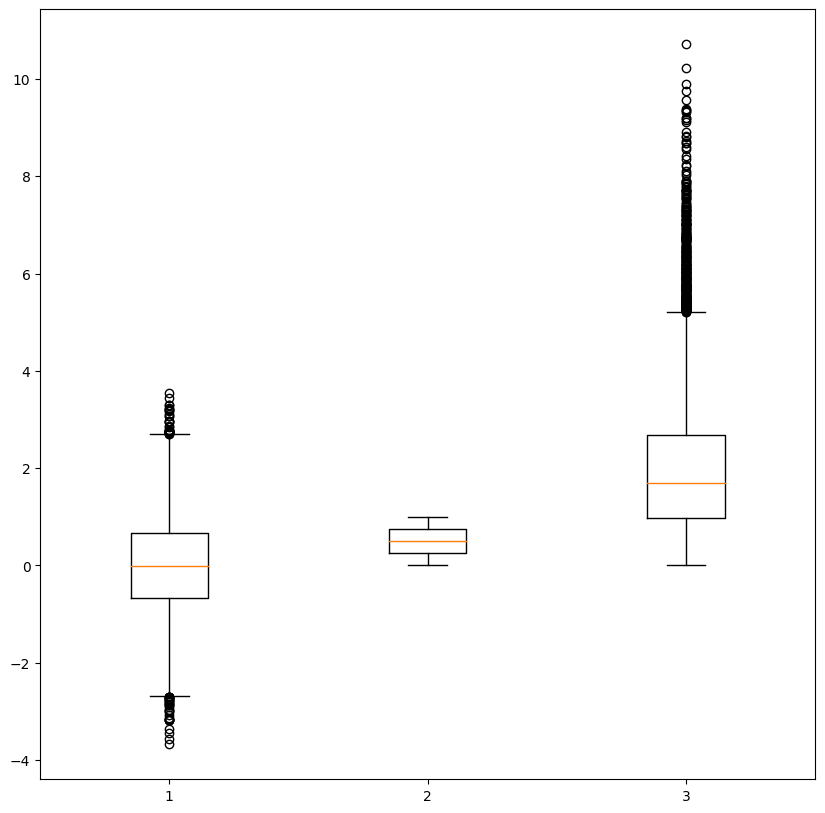

In [34]:
plt.figure(figsize=(10,10))
plt.boxplot([ df['normal'], df['random'], df['gamma'] ]);

Cada círculo no boxplot é uma única observação discrepante. O gráfico de caixa é um dos gráficos mais comuns que você pode usar como cientista de dados, e o matplotlib tem suporte significativo para diferentes tipos de gráficos de caixa.